In [924]:
import  { makeBuffer } from "../src/testdata.ts";

const chart = Array.from(makeBuffer(200));
chart;


[
   998.0936889648438,  977.4844970703125,  974.3526000976562,  975.3546752929688,
    976.585205078125,  969.2326049804688,    1012.1591796875,    1037.1044921875,
      1044.029296875, 1038.7235107421875,  1051.583251953125, 1063.0501708984375,
   1095.027587890625,    1093.3896484375,   1076.59814453125, 1040.7589111328125,
       1043.87109375,   1048.85302734375, 1080.6209716796875,    1065.6904296875,
  1066.1202392578125, 1091.4459228515625, 1091.4007568359375, 1094.1768798828125,
  1091.7269287109375, 1085.3729248046875,   1092.63623046875, 1095.1033935546875,
  1060.2081298828125,    1089.9970703125,  1094.482666015625,  1044.913330078125,
  1039.6309814453125,  1011.930419921875, 1008.9451293945312, 1025.0291748046875,
   993.1768188476562,  1025.174072265625, 1031.1392822265625,   1060.28369140625,
     1056.9052734375, 1067.1751708984375, 1091.9278564453125,   1088.83447265625,
   1084.819091796875,           1084.625, 1110.6766357421875, 1066.5682373046875,
  1079.2525634

In [925]:
import { regression } from "jsr:@sauber/statistics";

// Plot.lineY(chart, {x: "Date", y: "Close"}).plot({y: {grid: true}});

// const chart = [775, 794, 790, 803, 795, 793, 812, 800, 811, 823];
const reg = regression(chart);
const straight: number[] = chart.map((_, i) => reg.intercept + reg.gradiant * i);

// const offset = Math.min(...chart)/2;
const offset = 0;
const lchart = chart.map(n=>Math.log(n-offset));
const lreg = regression(lchart);
const curved: number[] = chart.map((_, i) => offset + Math.exp(lreg.intercept + lreg.gradiant * i));

[reg, lreg, chart, straight, curved];

[
  { intercept: 963.0161343064949, gradiant: 0.7956063677287732 },
  { intercept: 6.8746116855080865, gradiant: 0.000701303050427794 },
  [
     998.0936889648438,  977.4844970703125,  974.3526000976562,
     975.3546752929688,   976.585205078125,  969.2326049804688,
       1012.1591796875,    1037.1044921875,     1044.029296875,
    1038.7235107421875,  1051.583251953125, 1063.0501708984375,
     1095.027587890625,    1093.3896484375,   1076.59814453125,
    1040.7589111328125,      1043.87109375,   1048.85302734375,
    1080.6209716796875,    1065.6904296875, 1066.1202392578125,
    1091.4459228515625, 1091.4007568359375, 1094.1768798828125,
    1091.7269287109375, 1085.3729248046875,   1092.63623046875,
    1095.1033935546875, 1060.2081298828125,    1089.9970703125,
     1094.482666015625,  1044.913330078125, 1039.6309814453125,
     1011.930419921875, 1008.9451293945312, 1025.0291748046875,
     993.1768188476562,  1025.174072265625, 1031.1392822265625,
      1060.28369140625,    

In [926]:
import { std } from "jsr:@sauber/statistics";

const straightdev = std(chart.map((n, i) => n - straight[i]));
const curveddev = std(chart.map((n, i) => n - curved[i]));
// const peakToValley = Math.max(...chart) - Math.min(...chart);
// const maxDiff = Math.max(...chart.map((n, i) => Math.abs(n - curved[i])));
const mid = chart.slice().sort()[Math.round(chart.length / 2)];
const fragility = curveddev / mid;
[{straightdev, curveddev, mid, fragility}];


[
  {
    straightdev: 92.0514852922305,
    curveddev: 91.52211991222357,
    mid: 1177.8798828125,
    fragility: 0.07770072419752198
  }
]

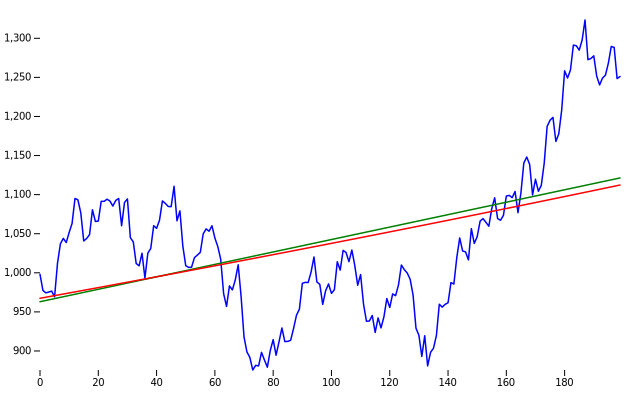

In [927]:
import Plot from "https://deno.land/x/plot/mod.ts";

Plot.plot({
  marks: [
    Plot.lineY(chart, {stroke: "blue"}),
    Plot.lineY(straight, {stroke: "green"}),
    Plot.lineY(curved, {stroke: "red"}),
  ]
});